# Red Wine Draft 8

# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import datetime
import sqlite3
import imblearn


from IPython.display import display
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Load Raw Data

In [2]:
redwine = pd.read_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\RedWine\\DataSets\\winequality-red.csv",
    index_col=False,
)

# Two Groups

In [3]:
redwine["quality"] = redwine["quality"].replace([8], 1)
redwine["quality"] = redwine["quality"].replace([3, 4, 5, 6, 7], 0)

# The Columns

In [24]:
feature_cols = [
    "density",
    "citric acid"
]

X = redwine[feature_cols]
y = redwine.quality

In [25]:
X

,density,citric acid
0,0.99780,0.00
1,0.99680,0.00
2,0.99700,0.04
3,0.99800,0.56
4,0.99780,0.00
...,...,...
1594,0.99490,0.08
1595,0.99512,0.10
1596,0.99574,0.13
1597,0.99547,0.12


# Random Over Sampler

In [26]:
oversample = RandomOverSampler(sampling_strategy="minority")
oversample = RandomOverSampler(sampling_strategy="auto")
steps = [("over", RandomOverSampler()), ("model", LogisticRegression())]
pipeline = Pipeline(steps=steps)
X, y = oversample.fit_resample(X, y)

In [27]:
X

,density,citric acid
0,0.99780,0.00
1,0.99680,0.00
2,0.99700,0.04
3,0.99800,0.56
4,0.99780,0.00
...,...,...
3157,0.99720,0.53
3158,0.99720,0.53
3159,0.99417,0.09
3160,0.99720,0.53


In [28]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3157    1
3158    1
3159    1
3160    1
3161    1
Name: quality, Length: 3162, dtype: int64

# The Model

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=True, test_size=0.2, random_state=0)
log_model = LogisticRegression(solver="liblinear", random_state=None)
log_model.fit(X_train, y_train)
y_predict = log_model.predict(X_test)

In [34]:
y_predict

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [35]:
y_test

2530    1
2499    1
1266    0
2764    1
1548    0
       ..
2702    1
3084    1
2445    1
3066    1
2314    1
Name: quality, Length: 1265, dtype: int64

# Confusion Matrix

In [30]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[384, 271],
       [192, 418]], dtype=int64)

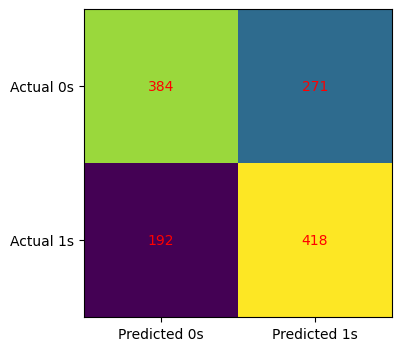

In [31]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.imshow(cm)
ax.grid(False)

ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))

ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()

# Classification Report

In [32]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.67      0.59      0.62       655
           1       0.61      0.69      0.64       610

    accuracy                           0.63      1265
   macro avg       0.64      0.64      0.63      1265
weighted avg       0.64      0.63      0.63      1265



# Receiver Operating Characteristic (ROC) Curve

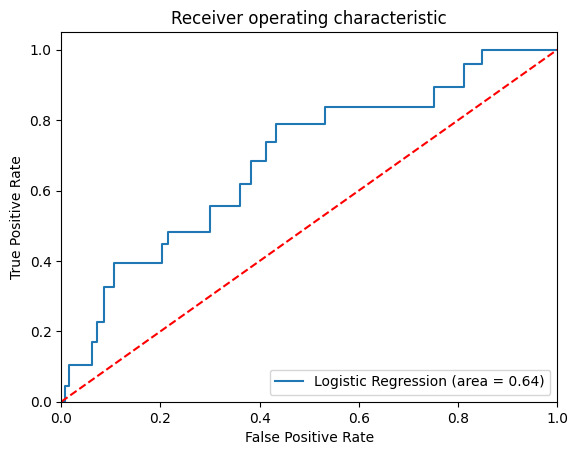

In [33]:
logit_roc_auc = roc_auc_score(y_test, y_predict)
fpr, tpr, thresholds = roc_curve(y_test, log_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()